In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import random
%matplotlib inline
random.seed(42)

In [2]:
os.getcwd()

'C:\\Users\\dell\\Project_files'

In [3]:
os.chdir('F:\\e_bond')

In [4]:
names= ['Date of Encashment', 'Name of the Political Party', 'Denomination' ]
table_1 = pd.read_excel('data_1.xlsx', sheet_name='Table 1', names = names)
table_2 = pd.read_excel('data_1.xlsx', sheet_name='Table 2', names = names, header=None)
table_3 = pd.read_excel('data_1.xlsx', sheet_name='Table 3', names = names, header = None)

In [5]:
parties = pd.concat([table_1, table_2, table_3], axis=0)

In [6]:
parties.head()

,Date of Encashment,Name of the Political Party,Denomination
0,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
1,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
2,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"1,00,00,000"
3,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"
4,2019-04-12,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,"10,00,000"


In [7]:
parties.describe()

C:\Users\dell\AppData\Local\Temp\ipykernel_3936\267728900.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  parties.describe()


,Date of Encashment,Name of the Political Party,Denomination
count,20421,20421,20421
unique,230,27,5
top,2019-04-18 00:00:00,BHARTIYA JANTA PARTY,"1,00,00,000"
freq,596,8633,12207
first,2019-04-12 00:00:00,NaN,NaN
last,2024-01-24 00:00:00,NaN,NaN


In [8]:
parties.isna().sum(axis = 0)

Date of Encashment             0
Name of the Political Party    0
Denomination                   0
dtype: int64

In [9]:
print(parties.iloc[:,1].value_counts())

BHARTIYA JANTA PARTY                              8633
ALL INDIA TRINAMOOL CONGRESS                      3305
PRESIDENT, ALL INDIA CONGRESS COMMITTEE           3146
BHARAT RASHTRA SAMITHI                            1806
BIJU JANATA DAL                                    861
DMK PARTY IN PARLIAMENT                            648
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R             472
SHIVSENA (POLITICAL PARTY)                         354
TELUGU DESAM PARTY                                 279
AAM AADMI PARTY                                    245
RASTRIYA JANTA DAL                                 149
NATIONALIST CONGRESS PARTY PARLIAMENT OF           116
JANATA DAL ( SECULAR )                              75
SIKKIM KRANTIKARI MORCHA                            50
ADYAKSHA SAMAJVADI PARTY                            46
JHARKHAND MUKTI MORCHA                              45
JANASENA PARTY                                      39
ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM            38
SHIROMANI 

In [42]:
buyers = pd.read_excel('data_2.xlsx')

In [43]:
buyers.head()

,Date of Purchase,Purchaser Name,Denomination
0,2019-04-12,A B C INDIA LIMITED,"1,00,000"
1,2019-04-12,A B C INDIA LIMITED,"1,00,000"
2,2019-04-12,A B C INDIA LIMITED,"10,00,000"
3,2019-04-12,A B C INDIA LIMITED,"10,00,000"
4,2019-04-12,A B C INDIA LIMITED,"1,00,000"


In [12]:
buyers.describe()

C:\Users\dell\AppData\Local\Temp\ipykernel_3936\1419144052.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  buyers.describe()


,Date of Purchase,Purchaser Name,Denomination
count,18871,18871,18871
unique,146,1320,5
top,2022-01-05 00:00:00,FUTURE GAMING AND HOTEL SERVICES PR,"1,00,00,000"
freq,570,1208,11671
first,2019-04-12 00:00:00,NaN,NaN
last,2024-01-11 00:00:00,NaN,NaN


In [13]:
buyers.isna().sum(axis=0)

Date of Purchase    0
Purchaser Name      0
Denomination        0
dtype: int64

In [14]:
party_fund_dict = {}
num = 0
Denomination = []
for i in range(len(parties)):
    party, fund =  list(parties.iloc[i,1:])
    if type(fund) == str:
        fund = "".join(fund.split(","))
    if party not in [party_fund_dict.keys()][0]:
        num +=1
        party_fund_dict[party] = float(fund)
        Denomination.append(float(fund))
    else:
        party_fund_dict[party] += float(fund)
        Denomination.append(float(fund))
    
print(num)

27


In [15]:
sum(party_fund_dict.values())

127690893000.0

In [16]:
parties['Denomination'] = Denomination

In [17]:
parties.describe()

,Denomination
count,2.042100e+04
mean,6.252921e+06
std,4.576321e+06
min,1.000000e+03
25%,1.000000e+06
50%,1.000000e+07
75%,1.000000e+07
max,1.000000e+07


In [18]:
party_wise_total_funds = pd.DataFrame({'party' : party_fund_dict.keys(), 'total_funds' : party_fund_dict.values()})

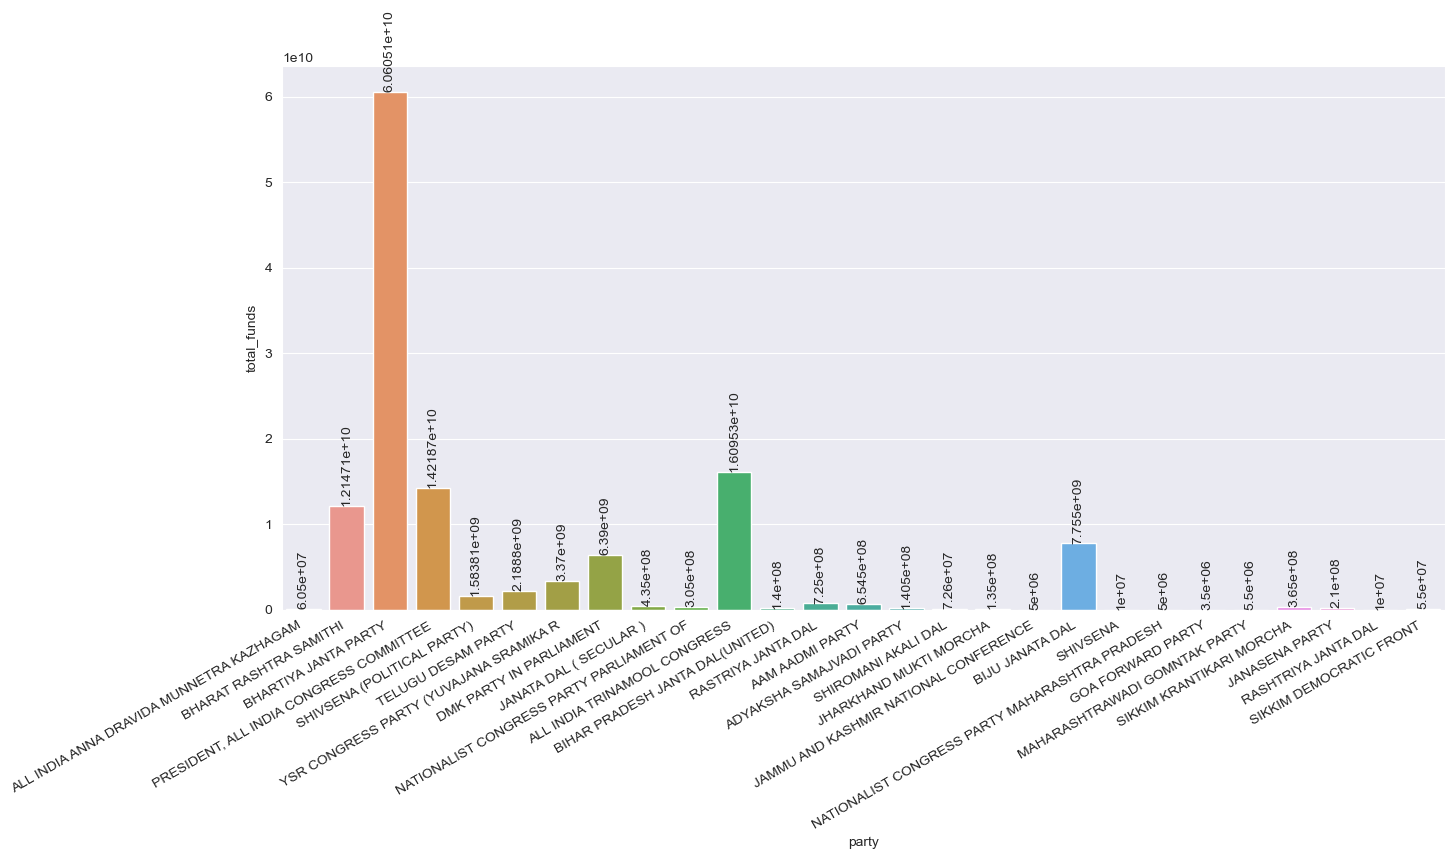

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
ax = sns.barplot(data= party_wise_total_funds, x = 'party', y = 'total_funds')
plt.gcf().autofmt_xdate()
for i in ax.containers:
    ax.bar_label(i,label_type='edge', rotation='vertical')
plt.show()

In [65]:
top_sorted_party = party_wise_total_funds.sort_values(by = 'total_funds', ascending =False)

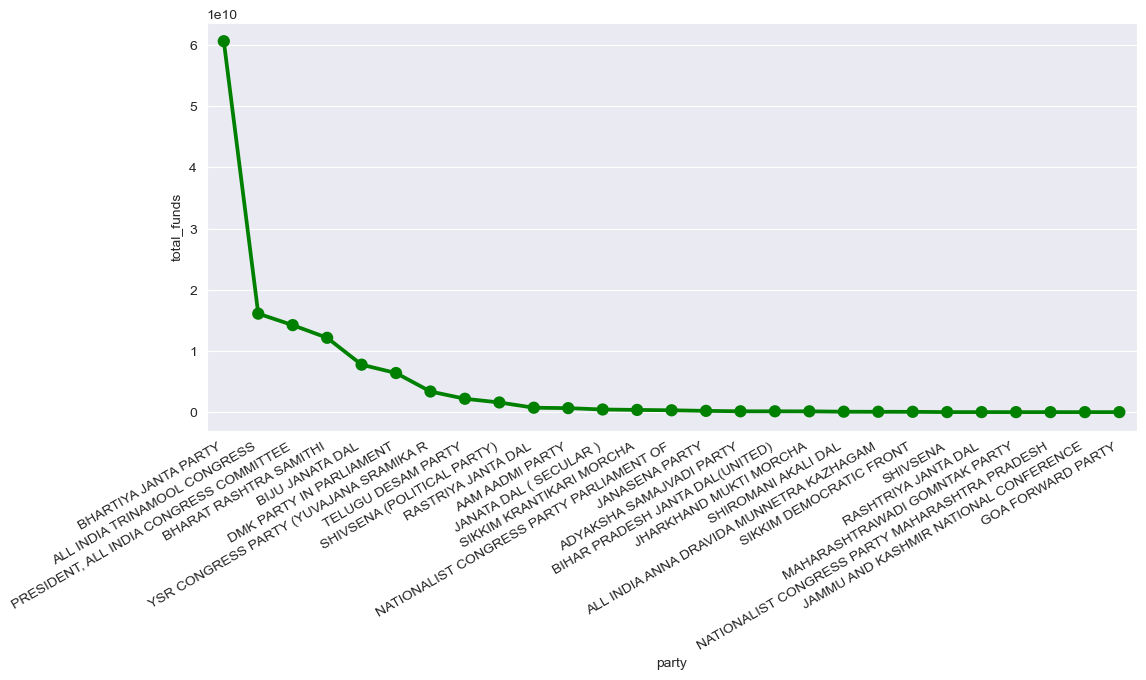

In [66]:
plt.figure(figsize=(12,6))
sns.pointplot(data=top_sorted_party, x= 'party', y='total_funds', color='green')
plt.gcf().autofmt_xdate()

In [78]:
top_12_party = top_sorted_party[:12]
rest = sum(top_sorted_party.loc[12:,'total_funds'])

In [79]:
rest

3337100000.0

In [80]:
top_12_party.head()

,party,total_funds
2,BHARTIYA JANTA PARTY,6.060511e+10
10,ALL INDIA TRINAMOOL CONGRESS,1.609531e+10
3,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1.421866e+10
1,BHARAT RASHTRA SAMITHI,1.214710e+10
18,BIJU JANATA DAL,7.755000e+09


In [81]:
others = {'party': 'Others', 'total_funds': rest}

In [82]:
top_12_party = top_12_party.append(others, ignore_index=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_3936\2995069649.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_12_party = top_12_party.append(others, ignore_index=True)


In [83]:
top_12_party

,party,total_funds
0,BHARTIYA JANTA PARTY,6.060511e+10
1,ALL INDIA TRINAMOOL CONGRESS,1.609531e+10
2,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",1.421866e+10
3,BHARAT RASHTRA SAMITHI,1.214710e+10
4,BIJU JANATA DAL,7.755000e+09
5,DMK PARTY IN PARLIAMENT,6.390000e+09
6,YSR CONGRESS PARTY (YUVAJANA SRAMIKA R,3.370000e+09
7,TELUGU DESAM PARTY,2.188800e+09
8,SHIVSENA (POLITICAL PARTY),1.583814e+09
9,RASTRIYA JANTA DAL,7.250000e+08


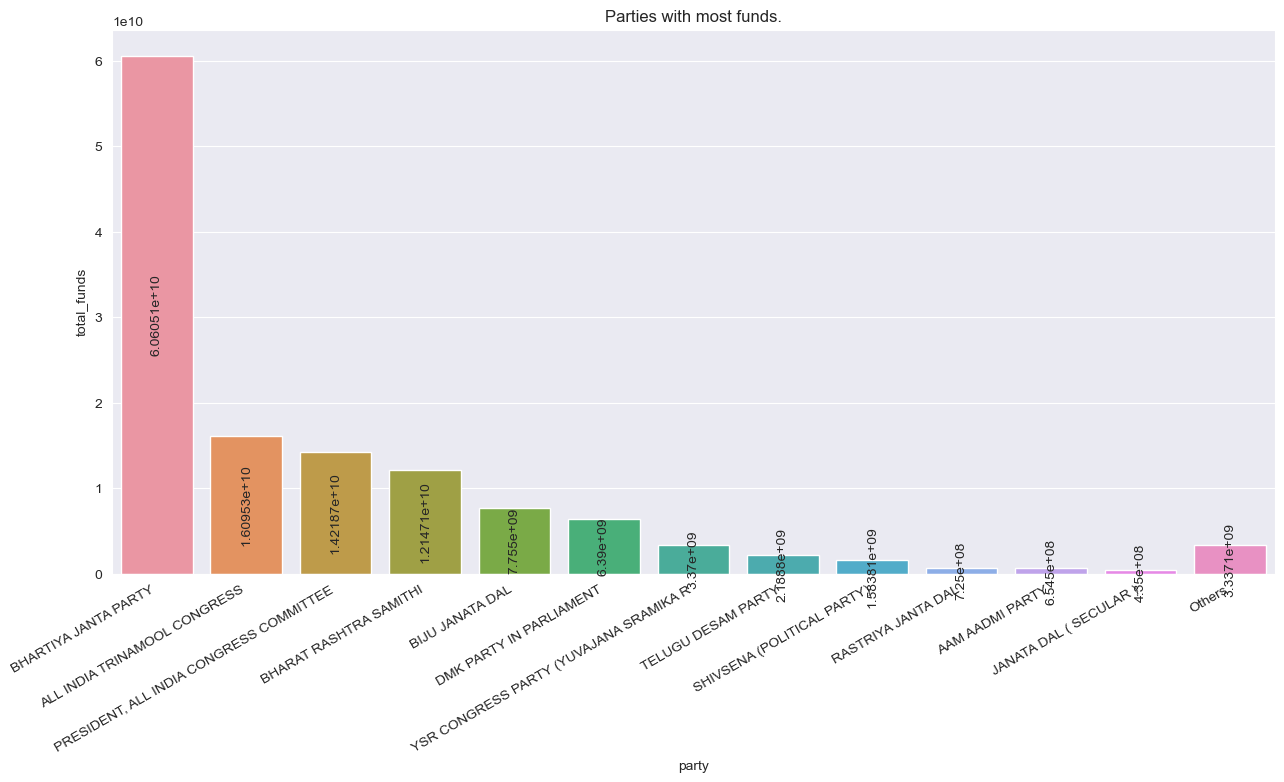

In [85]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data= top_12_party, x = 'party', y = 'total_funds')
plt.gcf().autofmt_xdate()
for i in ax.containers:
    ax.bar_label(i,label_type='center', rotation='vertical')
plt.title("Parties with most funds.")
plt.show()

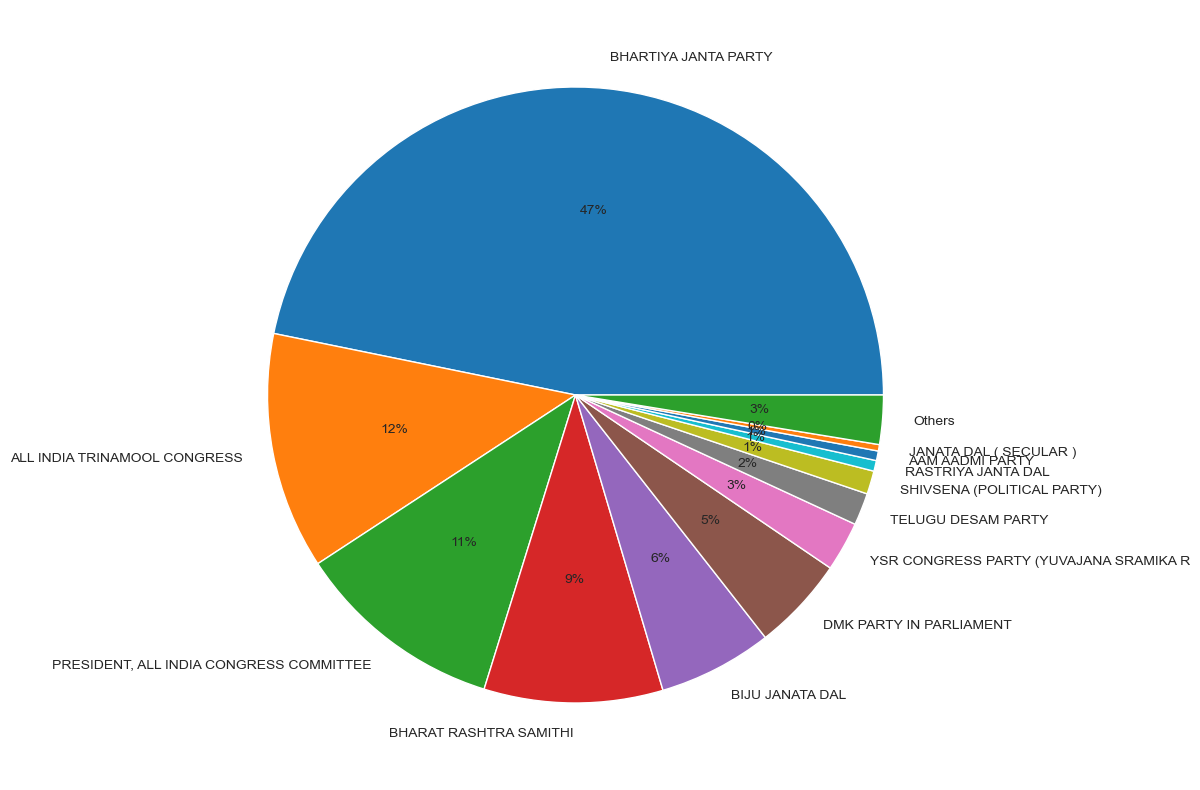

In [89]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
plt.pie(top_12_party.loc[:,'total_funds'], labels= top_12_party['party'], autopct='%.0f%%')
plt.show()

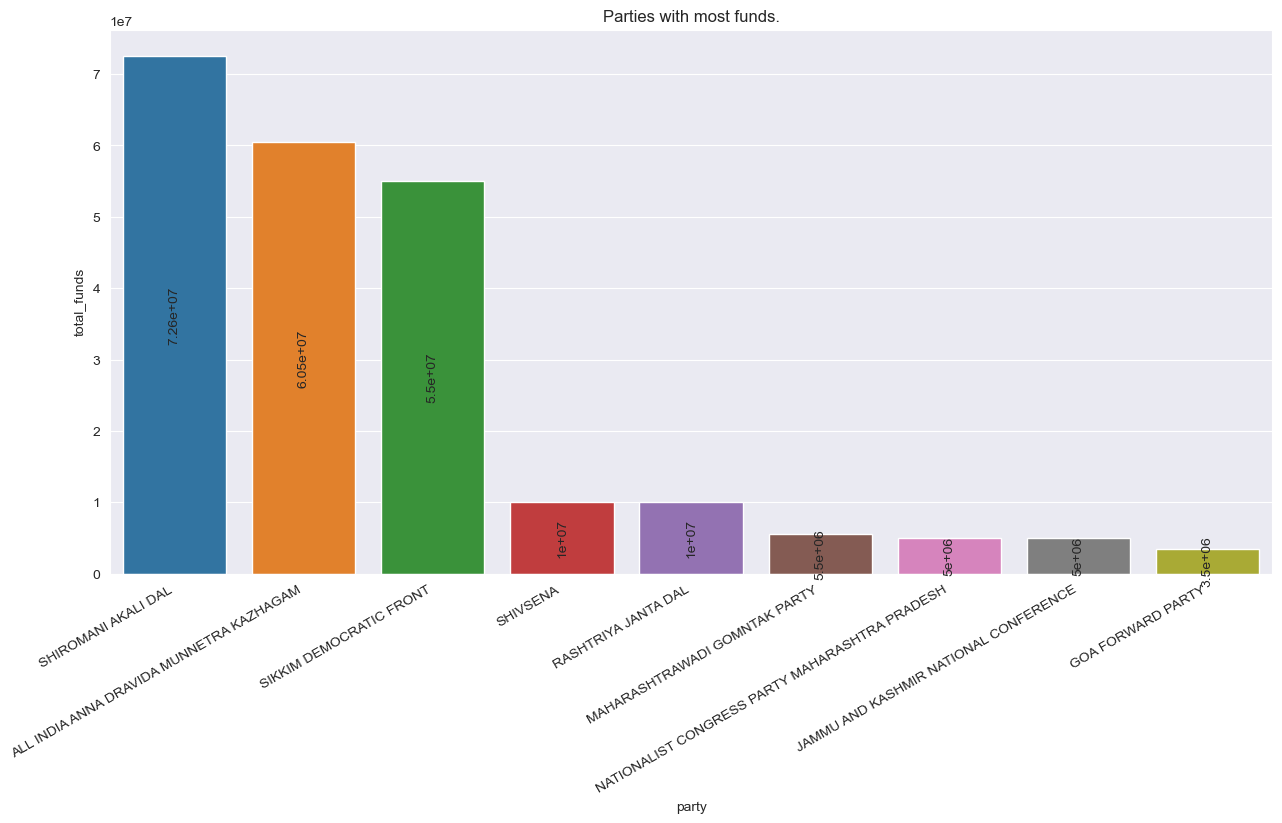

In [32]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data= top_sorted[18:], x = 'party', y = 'total_funds')
plt.gcf().autofmt_xdate()
for i in ax.containers:
    ax.bar_label(i,label_type='center', rotation='vertical')
plt.title("Parties with most funds.")
plt.show()

In [33]:
bjp = parties.loc[parties.loc[:,'Name of the Political Party']=='BHARTIYA JANTA PARTY']

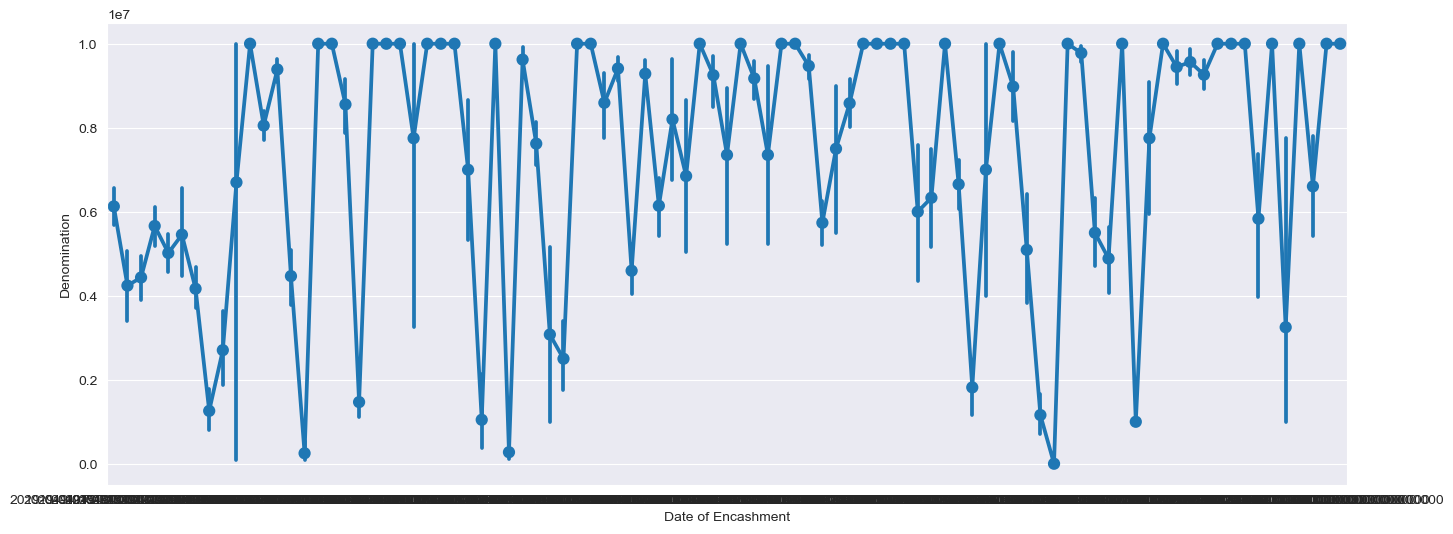

In [34]:
plt.figure(figsize=(16,6))
sns.pointplot(data= bjp, x = 'Date of Encashment', y= 'Denomination')
plt.show()

In [35]:
bjp.describe()

,Denomination
count,8.633000e+03
mean,7.020168e+06
std,4.331371e+06
min,1.000000e+03
25%,1.000000e+06
50%,1.000000e+07
75%,1.000000e+07
max,1.000000e+07


In [36]:
bjp.loc[bjp.loc[:,'Denomination'] == max(bjp.loc[:,'Denomination']),:]

,Date of Encashment,Name of the Political Party,Denomination
64,2019-04-12,BHARTIYA JANTA PARTY,10000000.0
65,2019-04-12,BHARTIYA JANTA PARTY,10000000.0
66,2019-04-12,BHARTIYA JANTA PARTY,10000000.0
67,2019-04-12,BHARTIYA JANTA PARTY,10000000.0
68,2019-04-12,BHARTIYA JANTA PARTY,10000000.0
...,...,...,...
2312,2024-01-24,BHARTIYA JANTA PARTY,10000000.0
2313,2024-01-24,BHARTIYA JANTA PARTY,10000000.0
2314,2024-01-24,BHARTIYA JANTA PARTY,10000000.0
2315,2024-01-24,BHARTIYA JANTA PARTY,10000000.0


In [37]:
max_bjp = bjp.loc[bjp.loc[:,'Denomination'] == max(bjp.loc[:,'Denomination'])]
print(max_bjp.value_counts()[:50])

Date of Encashment  Name of the Political Party  Denomination
2019-05-10          BHARTIYA JANTA PARTY         10000000.0      387
2022-01-10          BHARTIYA JANTA PARTY         10000000.0      250
2019-05-14          BHARTIYA JANTA PARTY         10000000.0      240
2019-04-12          BHARTIYA JANTA PARTY         10000000.0      232
2019-04-18          BHARTIYA JANTA PARTY         10000000.0      216
2022-11-16          BHARTIYA JANTA PARTY         10000000.0      201
2022-11-14          BHARTIYA JANTA PARTY         10000000.0      200
2023-10-13          BHARTIYA JANTA PARTY         10000000.0      197
2019-04-20          BHARTIYA JANTA PARTY         10000000.0      192
2022-11-18          BHARTIYA JANTA PARTY         10000000.0      185
2023-04-12          BHARTIYA JANTA PARTY         10000000.0      177
2022-01-14          BHARTIYA JANTA PARTY         10000000.0      174
2023-11-20          BHARTIYA JANTA PARTY         10000000.0      168
2021-04-12          BHARTIYA JANTA PARTY 

In [45]:
buyers.head()

,Date of Purchase,Purchaser Name,Denomination
0,2019-04-12,A B C INDIA LIMITED,"1,00,000"
1,2019-04-12,A B C INDIA LIMITED,"1,00,000"
2,2019-04-12,A B C INDIA LIMITED,"10,00,000"
3,2019-04-12,A B C INDIA LIMITED,"10,00,000"
4,2019-04-12,A B C INDIA LIMITED,"1,00,000"


In [103]:
buyers["Purchaser Name"].value_counts()[-200:]

GUWAHATI CARBON LIMITED                2
LILAC MERCHANDISE PRIVATE LIMITED      2
AMARAVATI TEKSYSTEMS PRIVATE LIMITE    2
TEKREANT INDIA PRIVATE LIMITED         2
DAFFODIL GOODS PRIVATE LIMITED         2
                                      ..
MR. SAMEER  BHATIA                     1
R.S.BROTHERS RETIAL INDIA PVT LTD      1
B.DAS AND ASSOCIATES PVT. LTD.         1
J B ENTERPRISE                         1
GORUKANTI DEVENDER RAO                 1
Name: Purchaser Name, Length: 200, dtype: int64

In [47]:
buyers_fund_dict = {}
num = 0
Denomination = []
for i in range(len(buyers)):
    buyer, fund =  list(buyers.iloc[i,1:])
    if type(fund) == str:
        fund = "".join(fund.split(","))
    if buyer not in [buyers_fund_dict.keys()][0]:
        num +=1
        buyers_fund_dict[buyer] = float(fund)
        Denomination.append(float(fund))
    else:
        buyers_fund_dict[buyer] += float(fund)
        Denomination.append(float(fund))
print(num)


1320


In [48]:
buyers['Denomination'] = Denomination

In [49]:
buyers.describe()

,Denomination
count,1.887100e+04
mean,6.441372e+06
std,4.538947e+06
min,1.000000e+03
25%,1.000000e+06
50%,1.000000e+07
75%,1.000000e+07
max,1.000000e+07


In [50]:
sum(buyers.Denomination)

121555132000.0

In [51]:
sum(parties.Denomination) - sum(buyers.Denomination)

6135761000.0

In [52]:
buyers_wise_total_funds = pd.DataFrame({'buyers' : buyers_fund_dict.keys(), 'total_funds' : buyers_fund_dict.values()})

In [53]:
buyers_wise_total_funds.describe()

,total_funds
count,1.320000e+03
mean,9.208722e+07
std,4.778677e+08
min,1.000000e+03
25%,2.500000e+06
50%,1.225000e+07
75%,5.000000e+07
max,1.208000e+10


In [54]:
top_sorted_buyers = buyers_wise_total_funds.sort_values(by="total_funds", ascending= False)

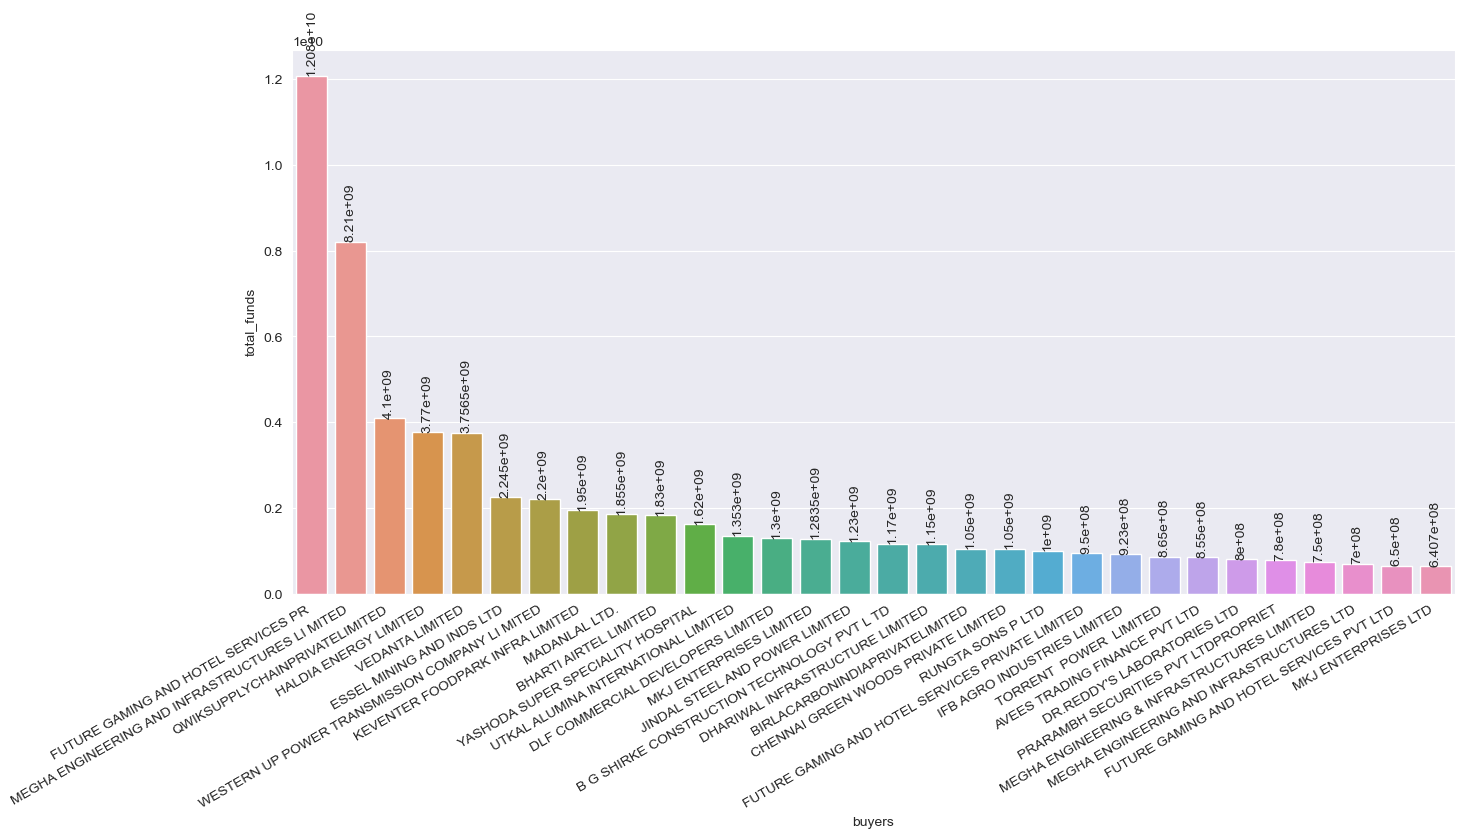

In [60]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
ax = sns.barplot(data= top_sorted_buyers[:30], x = 'buyers', y = 'total_funds')
plt.gcf().autofmt_xdate()
for i in ax.containers:
    ax.bar_label(i,label_type='edge', rotation='vertical')
plt.show()

In [98]:
top_sorted_buyers[top_sorted_buyers['total_funds']>=10000000].to_csv('top_sorted.csv')